
# Support Vector Machine

## References 

* https://en.wikipedia.org/wiki/Dot_product
* https://www.cs.cornell.edu/courses/cs4780/2022fa/lectures/lecturenote09.html
* https://mlguidebook.com/en/latest/perceptron/explore.html
* https://en.wikipedia.org/wiki/Support_vector_machine
* convex optimization docs http://cvxopt.org/, https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf
* https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style

plt.style.use("fivethirtyeight")

%matplotlib inline

## Assumptions

* Binary Classification y = {-1, 1}
* Data is linearly Separable


## Concept

![hyperplane](./hyperplane.drawio.svg)

* Defining a linear classifier 
\begin{align*} 
h(x) = sign(w^T x + b)
\end{align*}

* binary classification with labels -1 and +1
* Typically data is linearly separable and there exist a plane with dimension n - 1 (where n is dimenstion of column space). This plane is defined by `Maximum Margin Hyperplane`
* As perceptron also creates a hyperplane between the classes to linearly separate them. but it is needed to create a hyperplane that is optimum.
* In above diagram we can see 3 hyperplanes. hyperplane 2 and 3 also separates the classes, but the test data point is wrongly classified with hyperplane 2's scenario. In essence, explaining that plane 2 and 3 are not generalized or optimum solutions.
<!-- * only one vs rest -->


### Maximum Margin Hyperplane

* The plane maximizing the distance to the closest point from both classes
* Hyperplane is good if it maximizes the margin (which is minimum distance from both classes)

## Margin

Hyperplane is defined by $\vec{w}$ as

\begin{align} 
\mathcal{H} &= \{x | w^T x + b = 0\} 
\end{align}

![margin](./margin.drawio.svg)

Let $\gamma$ be the minimum distance from the hyperplane and closest point from both classes

\begin{align} 
\vec{x_p} &= \vec{x} - \vec{d} \\
w^T x_p + b &= 0 \text{ point on the hyperplane }\\
w^T ( \vec{x} - \vec{d} ) + b &= 0\\ \\
\vec{d} &= \alpha \vec{x}  && \because \text{ d is rescaled vector of w} \\ \\
w^T ( \vec{x} - \alpha \vec{w} ) + b &= 0\\
\Rightarrow \alpha &= \frac{w^T x + b}{w^T w}\\ \\
\vec{d} &= \frac{w^T x + b}{w^T x} . \vec{x}\\
||d||_2 &= \sqrt{d^T d} = \sqrt{\alpha^2 w^T w}\\
&= \alpha \sqrt{w^T w} = \frac{w^T x + b}{w^T x} \sqrt{w^T w}\\
||d||_2 &= \frac{w^T x + b}{\sqrt{w^T w}}\\
||d||_2 &= \frac{w^T x + b}{||w||_2}\\ \\
\text{margin } \gamma(w, b) &= {min\atop{x \in D}} \frac{w^T x + b}{||w||_2} 
\end{align}

## Algorithm
Now according to the definition of maximum margin classifier 

\begin{align} 
{max\atop{w, b}}  \gamma(w, b)
\end{align}

But there is a problem with this definition as if we just want to increase the margin it can be anywhere (like $\infty$ )

This means we need to constraint the hyperplane to be between the classes or the plane of data (necessarily)

Now

\begin{align} 
{max\atop{w, b}} \gamma(w,b) && \forall i : y_i (w^T x_i + b) \geq 0 
\end{align}

we added constraint to  make sure the hyperplane is between the classes

as we know $y \in \{-1, 1\}$

if $w^T x + b = -1$ and correctly classified then $-1 \times -1 = 1$ and for label 1 as well.

if we move forward with this, then

\begin{align} 
{max\atop{w, b}} \big[ {min\atop{x \in D}} \frac{|w^T x + b|}{w^ T w} \big] && \forall i : y_i (w^T x_i + b) \geq 0 \\ \\
{max\atop{w, b}} \frac{1}{w^T w} \big[ {min\atop{x \in D}} |w^T x + b| \big] && \forall i : y_i (w^T x_i + b) \geq 0 
\end{align}



![margin2](./margin2.drawio.svg)


\begin{align} 
H &= \{ x : w^T x + b = 0\} 
\end{align}

`Special Trick`
If we rescale the value of w and b to any positive value then the result is going to be the same (means there is no unique solution)



\begin{align} 
{max\atop{w, b}} \frac{1}{w^T w} \big[ {min\atop{x \in D}} |w^T x + b| \big] 
\\ \\ \forall i : y_i (w^T x_i + b) \geq 0 \\ \\ {\min\atop{x \in D}} | w^T x + b | = 1 
\end{align}

Minimum margin value is 1. There exist a solution possible where minimum margin is 1.

\begin{align} 
{min\atop{w, b}} w^T w && \forall i: y_i(w^T x_i + b) \geq 0 \\ && {min\atop{x \in D}} | w^T x + b | = 1 \\ \\
& \Updownarrow \\ \\
{min\atop{w, b}} w^T w && \forall i: y_i(w^T x_i + b) \geq 1 
\end{align}

### SVM with soft contraints


* what if maximum margin or perfectly separating hyperplane doesn't exist (ie there will always be one data point misclassified by the algorithm) 

* We'll introduce a slack variable

\begin{align*} 
{min \atop{w,b}} w^T w + c \sum_{i=1}^{n} \xi_i && \forall i : y_i(w^T x_i + b) \geq 1 - \xi_i \\ 
&& \forall i : \xi_i \geq 0
\end{align*}

\begin{align} 
\xi_i 
\begin{cases} 1 - y_i (w^T x_i + b) && \text{if } y_i(w^T x_i + b) \lt 1 (\text{misclassifications, 1 x -1 and -1 x 1})\\ \\ 
0 && \text{if } y_i(w^T x_i + b) \geq 1 (\text{correctly classified results})
\end{cases} 
\end{align}

This becomes

\begin{align} 
{min\atop{w,b}} \underbrace{w^T w}_{l2 regularizer} &+ c \underbrace{\sum \max(1 - y_i (w^T x_i + b), 0)}_{loss}\\ \\
\text{let } c &= \frac{1}{\lambda} \\ \\
L(w, x, b) &= {min \atop{w, b}} \lambda w^T w + \sum \max(1 - y_i (w^T x_i + b), 0) \\ \\
\Rightarrow & {min \atop{w, b}} \frac{1}{n} \sum_{i=1}^{n} \underbrace{l(h_w(x_i), y_i)}_{loss} + \lambda \underbrace{\gamma{(w)}}_{regularizer} 
\end{align}

Now this is very similar to logistic regression

## Data Prep

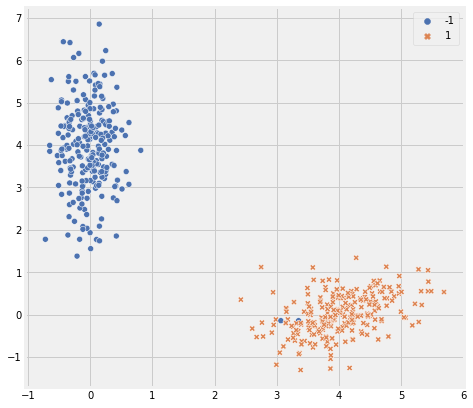

In [2]:
from sklearn.datasets import make_classification
from sklearn import metrics

X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_classes=2, shift=2,
                           class_sep=2, n_clusters_per_class=1, random_state=444)

y = np.where(y == 0, 1, -1) # to change classes from 0,1 to -1,1

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax, palette='deep')
plt.show()

### Gradient Descent
\begin{align}
L(w, x, b) &= {min \atop{w, b}} \lambda w^T w + \sum \max(1 - y_i (w^T x_i + b), 0) \\ \\
\frac{\delta L}{\delta w} &=
\begin{cases} 
2 \lambda w - y_i  x_i & \text{if } y_i(w^T x_i + b) \lt 1 \\ \\
2 \lambda w & \text{if } y_i(w^T x_i + b) \ge 1
\end{cases} \\ \\
\frac{\delta L}{\delta b} &= - y_i 
\end{align}


\begin{align} 
\text{run until convergence } \big\{ \\ \\
w &:= w - \alpha \frac{\delta L}{\delta w} \\
b &:= b - \alpha \frac{\delta L}{\delta b} \\ \\
\big\} 
\end{align}

In [3]:
# np.random.seed(3)

class SVM:
    def __init__(self, n_iter = 100, lambda_param = 0.01, learning_rate = 0.001):
        self.n_iter = n_iter
        self.lambda_param = lambda_param
        self.learning_rate = learning_rate
        self.w = None
        self.b = None
        self.l_loss = None
        self.l_margin = None
        
    @property
    def margin(self):
        # return 1 / np.linalg.norm(self.w, ord=2) 
        return 1 / np.sqrt(np.sum(np.square(model.w)))
    
    @property
    def loss(self):
        return self.l_loss
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.w = np.zeros(n_features) #np.random.rand(n_features)
        self.b = 0
        self.l_loss = []
        self.l_margin = []
        
        for _ in range(self.n_iter):
            for i in range(n_samples):
                if (y[i] * ((self.w @ X[i].T) + self.b)) >= 1:
                    self.w = self.w - ( self.learning_rate * (2 * self.lambda_param * self.w))
                else:
                    self.w = self.w - ( self.learning_rate * (( 2 * self.lambda_param * self.w ) - (y[i] * X[i])))
                    self.b = self.b + ( self.learning_rate * y[i] )
                    
                self.l_loss.append(metrics.hinge_loss(y, self.predict(X)))
                self.l_margin.append(self.margin)
                
                    
    def predict(self, X):
        return np.sign((self.w @ X.T) + self.b)
    
    
    def plot_boundary(self, X, ax=None):
        # np.random.seed(10)

        y_pred = self.predict(X)
        margin = self.margin
    
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(7, 7))
            ax.set_title("Dicision Boundary - Hyperplane")
            
        xx, yy = np.meshgrid(
            np.linspace(X[:, 0].min() - 1 , X[:, 0].max() + 1 , 50),
            np.linspace(X[:, 1].min() - 1 , X[:, 1].max() + 1 , 50)
        )
        mesh = np.c_[xx.ravel(), yy.ravel()]
        mesh_pred = self.predict(mesh)
        zz = mesh_pred.reshape(xx.shape)


        ax.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.2)
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, ax=ax, palette='deep')        
        
        
        # get the separating hyperplane
        a = -self.w[0]/self.w[1]
        xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 50)
        hyperplane = a * xx - (self.b) / self.w[1]

        hyperplane_margin_up = hyperplane + np.sqrt(1 + a**2) * margin
        hyperplane_margin_down = hyperplane - np.sqrt(1 + a**2) * margin

        # Plot margin lines
        ax.plot(xx, hyperplane, 'k-', lw=1)
        ax.plot(xx, hyperplane_margin_up, 'r--', lw=1)
        ax.plot(xx, hyperplane_margin_down, 'b--', lw=1)
        
        ax.legend()
        
    def plot_loss(self, ax=None):
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(7, 7))
            ax.set_title("Loss over iterations")
            
        ax.plot(self.loss)
        
        
    def plot_margin(self, ax=None):
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(7, 7))
            ax.set_title("Margin over iterations")
            
        ax.plot(self.l_margin)
        
        
    def plot(self, X):
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        
        self.plot_boundary(X, ax=ax[0])
        ax[0].set_title("Dicision Boundary - Hyperplane")
        
        self.plot_loss(ax=ax[1])
        ax[1].set_title("Loss over iterations")
        
        self.plot_margin(ax=ax[2])
        ax[2].set_title("Margin over iterations")
        

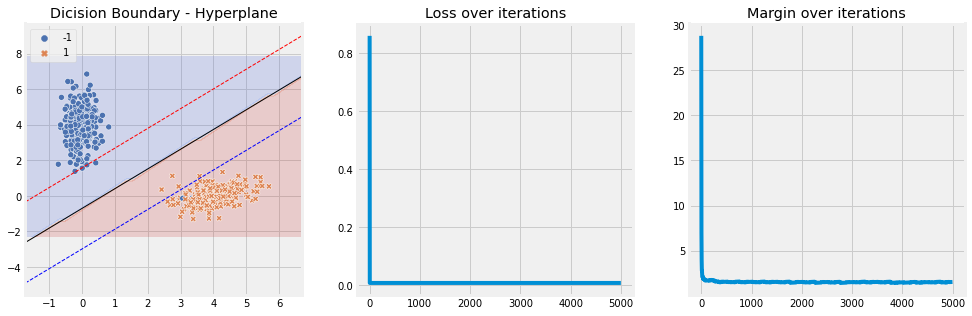

In [4]:
model = SVM(n_iter=10, lambda_param=0.01, learning_rate=0.01)
model.fit(X, y)
model.plot(X)

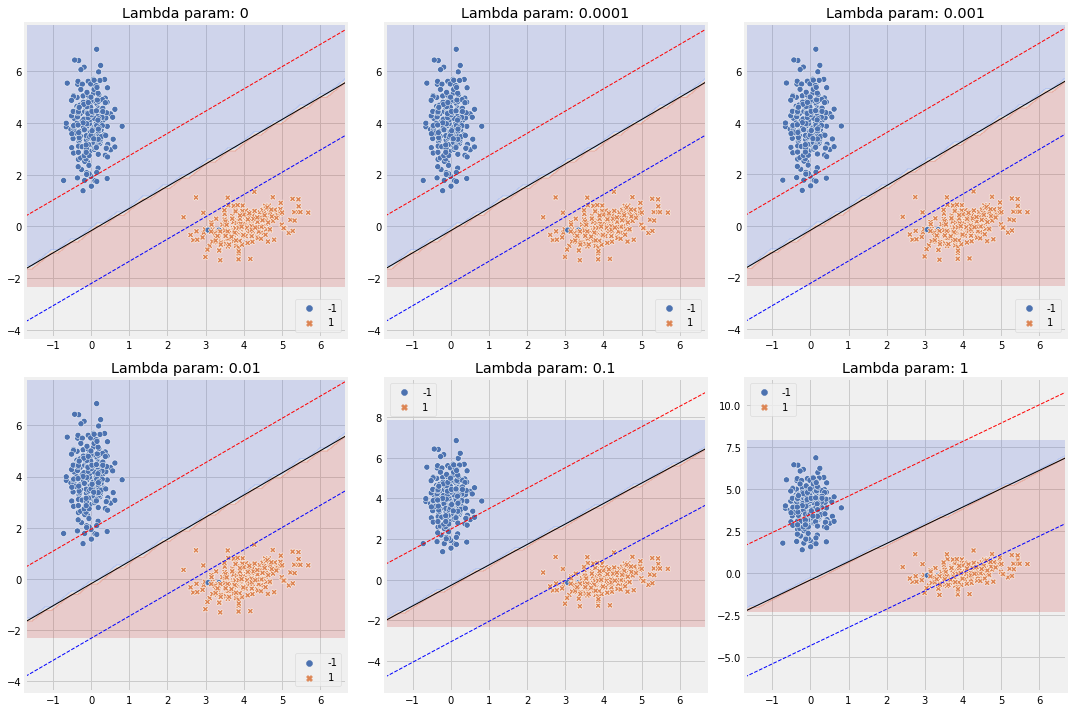

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax_ = ax.ravel()

for idx, c_ in enumerate([0, 0.0001, 0.001, 0.01, 0.1, 1]):
    model = SVM(n_iter=10, lambda_param=c_, learning_rate=0.001)
    model.fit(X, y)
    model.plot_boundary(X, ax=ax_[idx])
    ax_[idx].set_title(f"Lambda param: {c_}")

plt.tight_layout()
plt.show()